## Initialize Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

aggregated_data = r"D:\Users\91584\PycharmProjects\uitb-headsup-computing\huc\envs\mobile_reading\results\0814 from ps's\selection_results_35m_50ep_12cells.csv"
# individual_data = r"D:\Users\91584\PycharmProjects\uitb-headsup-computing\huc\envs\mobile_reading\results\0814 from ps's\selection_individual_data_35m_50ep_12cells.csv"
# individual_data = r"D:\Users\91584\PycharmProjects\uitb-headsup-computing\huc\envs\mobile_reading\results\0815 from peisen's computer\selection_individual_data_12cells_0815_200ep_35m.csv"
individual_data = r"D:\Users\91584\PycharmProjects\uitb-headsup-computing\huc\envs\mobile_reading\results\0817_0630_selection_individual_data.csv"

human_duration_data = r"D:\Users\91584\PycharmProjects\uitb-headsup-computing\huc\envs\mobile_reading\results\human data\word selection duration.csv"
human_error_rate_data = r"D:\Users\91584\PycharmProjects\uitb-headsup-computing\huc\envs\mobile_reading\results\human data\word selection error rate.csv"

individual_df = pd.read_csv(individual_data)
human_duration_df = pd.read_csv(human_duration_data)
human_error_rate_df = pd.read_csv(human_error_rate_data)

duration_sim_to_real = 1/6.7   # step_to_second
error_sim_to_real = 6.5

# print(individual_df['weight_memory_decay'].unique())
params_ = {
    'init_delta_t':3.5,
    'init_sigma_position_memory':0.5,
    'weight_memory_decay':0.6,
    'spatial_dist_coeff':2.5,
}

def extract_data(df, col_name, layouts):
    # Filter the dataframe based on the provided params
    for key, value in params_.items():
        if isinstance(value, float):
            df = df[np.isclose(df[key], value, atol=1e-8)]
        else:
            df = df[df[key] == value]
    
    data = []
    for layout in layouts:
        subset = df[df['layout'] == layout][col_name].tolist()
        data.append(subset)
    return data

## Word Selection Duration

[[7.462686567164178, 0.8955223880597014, 1.4925373134328357, 1.4925373134328357, 0.8955223880597014, 1.4925373134328357, 0.8955223880597014, 0.8955223880597014, 0.8955223880597014, 1.4925373134328357, 0.8955223880597014, 0.8955223880597014, 0.8955223880597014, 2.08955223880597, 0.8955223880597014, 3.880597014925373, 0.8955223880597014, 0.8955223880597014, 0.8955223880597014, 0.8955223880597014, 5.671641791044776, 0.8955223880597014, 5.671641791044776, 0.8955223880597014, 0.8955223880597014, 0.8955223880597014, 0.8955223880597014, 1.4925373134328357, 0.8955223880597014, 0.8955223880597014, 2.6865671641791042, 0.8955223880597014, 1.4925373134328357, 0.8955223880597014, 0.8955223880597014, 1.4925373134328357, 2.08955223880597, 2.6865671641791042, 1.4925373134328357, 1.4925373134328357, 0.8955223880597014, 2.08955223880597, 0.8955223880597014, 2.08955223880597, 0.8955223880597014, 0.8955223880597014, 0.8955223880597014, 2.08955223880597, 0.8955223880597014, 0.8955223880597014], [0.89552238

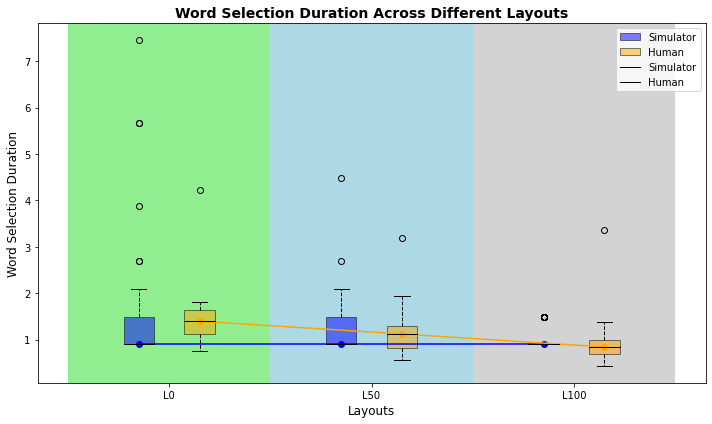

In [6]:
# Extract unique event levels from the combined dataframe
layouts = individual_df['layout'].unique()

# Extract the data for each agent
simulation_results = extract_data(individual_df, 'steps', layouts)
simulation_results = [[item * duration_sim_to_real for item in sublist] for sublist in simulation_results]

print(simulation_results)

human_data = [human_duration_df[col].tolist() for col in human_duration_df.columns if col != "Participant"]

# Data Preparation
x_labels = ["L0", "L50", "L100"]
x = np.arange(len(x_labels))

medians_simulator = [np.median(data) for data in simulation_results]
medians_human = [np.median(data) for data in human_data]

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set width for boxplots
box_width = 0.15

# Boxplot settings
boxprops = dict(alpha=0.5)
medianprops = dict(color='black')
whiskerprops = dict(linestyle='--')

# Shaded regions for the background event update levels
colors = ['lightgreen', 'lightblue', 'lightgray']
for i, color in enumerate(colors):
    ax.axvspan(i - 0.5, i + 0.5, facecolor=color)

# Plot boxplots for agents a, b, and c
bp1 = ax.boxplot(simulation_results, positions=x - box_width, widths=box_width, patch_artist=True, boxprops=dict(facecolor='blue', **boxprops), medianprops=medianprops, whiskerprops=whiskerprops)
bp2 = ax.boxplot(human_data, positions=x + box_width, widths=box_width, patch_artist=True, boxprops=dict(facecolor='orange', **boxprops), medianprops=medianprops, whiskerprops=whiskerprops)

# Plot median trends
ax.plot(x - box_width, medians_simulator, 'o-', color='blue', label='Simulator Median')
ax.plot(x + box_width, medians_human, 'o-', color='orange', label='Human Median')

# Styling
ax.set_title("Word Selection Duration Across Different Layouts", fontsize=14, fontweight='bold')
ax.set_xlabel("Layouts", fontsize=12)
ax.set_ylabel("Word Selection Duration", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp1["medians"][0], bp2["medians"][0]], ['Simulator', 'Human', 'Simulator', 'Human'])

# Adjust the layout
plt.tight_layout()

plt.show()

means of simulator: [1.3846153846153848, 1.2892307692307694, 1.2153846153846155], sem of simulator: [0.03861507814772657, 0.03564386633209972, 0.023407883161081444]
means of human: [1.5716666666666665, 1.2458333333333333, 1.0316666666666665], sem of human: [0.24678722654380883, 0.19933729905939906, 0.21577970161632354]



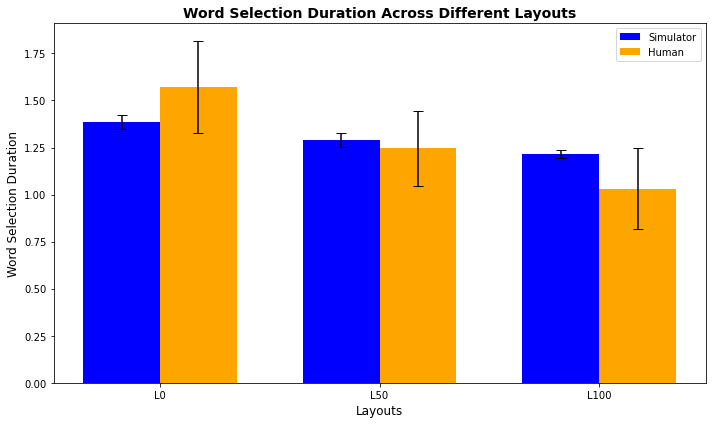

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract unique event levels from the combined dataframe
layouts = individual_df['layout'].unique()

# Extract the data for each agent
simulation_results = extract_data(individual_df, 'steps', layouts)
simulation_results = [[item * duration_sim_to_real for item in sublist] for sublist in simulation_results]
human_data = [human_duration_df[col].tolist() for col in human_duration_df.columns if col != "Participant"]

# Function to calculate means and standard error of the mean
def calculate_mean_and_sem(data):
    means = [np.mean(d) for d in data]
    sems = [np.std(d) / np.sqrt(len(d)) for d in data]
    return means, sems

means_simulator, sem_simulator = calculate_mean_and_sem(simulation_results)
means_human, sem_human = calculate_mean_and_sem(human_data)

print(f"means of simulator: {means_simulator}, sem of simulator: {sem_simulator}\n"
      f"means of human: {means_human}, sem of human: {sem_human}\n")

# Data Preparation
x_labels = ["L0", "L50", "L100"]
x = np.arange(len(x_labels))

# Bar chart plotting
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_width/2, means_simulator, yerr=sem_simulator, color='blue', width=bar_width, label='Simulator', capsize=5)
ax.bar(x + bar_width/2, means_human, yerr=sem_human, color='orange', width=bar_width, label='Human', capsize=5)

# Styling
ax.set_title("Word Selection Duration Across Different Layouts", fontsize=14, fontweight='bold')
ax.set_xlabel("Layouts", fontsize=12)
ax.set_ylabel("Word Selection Duration", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

plt.tight_layout()
plt.show()

## Word Selection Error Rate

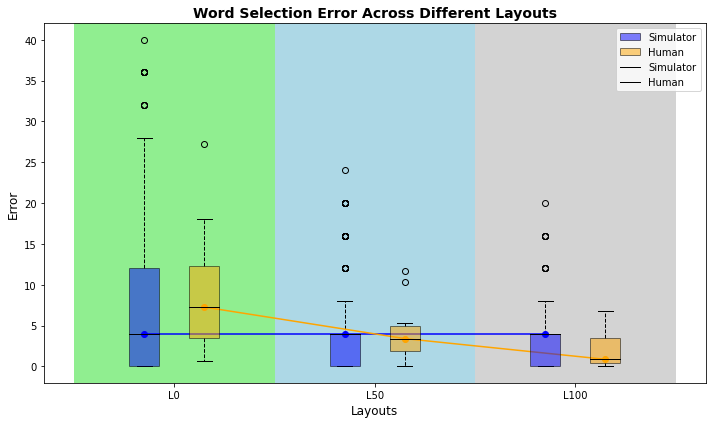

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ... [your import statements and initial data setup]

# Extract the data for each agent using the 'error' column
simulation_error_results = extract_data(individual_df, 'error', layouts)
simulation_error_results = [[item * error_sim_to_real for item in sublist] for sublist in simulation_error_results]
human_error_data = [human_error_rate_df[col].tolist() for col in human_error_rate_df.columns if col != "Participant"]

# Data Preparation
x_labels = ["L0", "L50", "L100"]
x = np.arange(len(x_labels))

medians_simulator = [np.median(data) for data in simulation_error_results]
medians_human = [np.median(data) for data in human_error_data]

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set width for boxplots
box_width = 0.15

# Boxplot settings
boxprops = dict(alpha=0.5)
medianprops = dict(color='black')
whiskerprops = dict(linestyle='--')

# Shaded regions for the background event update levels
colors = ['lightgreen', 'lightblue', 'lightgray']
for i, color in enumerate(colors):
    ax.axvspan(i - 0.5, i + 0.5, facecolor=color)

# Plot boxplots for Simulator and Human
bp1 = ax.boxplot(simulation_error_results, positions=x - box_width, widths=box_width, patch_artist=True, boxprops=dict(facecolor='blue', **boxprops), medianprops=medianprops, whiskerprops=whiskerprops)
bp2 = ax.boxplot(human_error_data, positions=x + box_width, widths=box_width, patch_artist=True, boxprops=dict(facecolor='orange', **boxprops), medianprops=medianprops, whiskerprops=whiskerprops)

# Plot median trends
ax.plot(x - box_width, medians_simulator, 'o-', color='blue', label='Simulator Median')
ax.plot(x + box_width, medians_human, 'o-', color='orange', label='Human Median')

# Styling
ax.set_title("Word Selection Error Across Different Layouts", fontsize=14, fontweight='bold')
ax.set_xlabel("Layouts", fontsize=12)
ax.set_ylabel("Error", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp1["medians"][0], bp2["medians"][0]], ['Simulator', 'Human', 'Simulator', 'Human'])

# Adjust the layout
plt.tight_layout()

plt.show()


means of simulator: [8.58, 4.3, 3.2], sem of simulator: [0.6719508910627323, 0.4088398219351925, 0.25298221281347033]
means of human: [9.310833333333335, 4.2749999999999995, 2.015833333333333], sem of human: [2.1608458536510056, 0.9680145057453083, 0.6235577340432762]



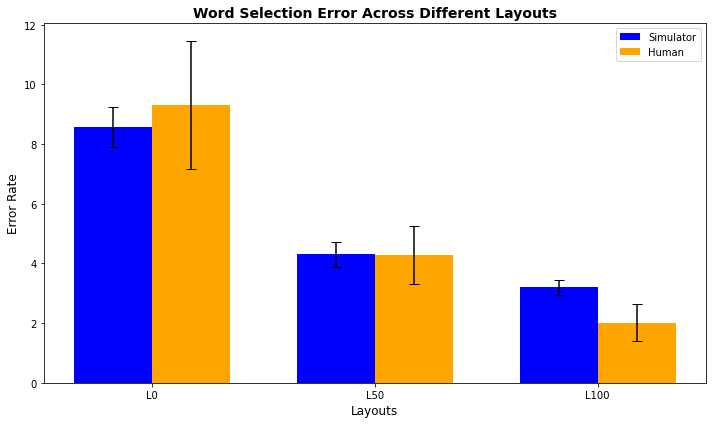

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract the data for the 'error' column
simulation_error_results = extract_data(individual_df, 'error', layouts)
simulation_error_results = [[item * error_sim_to_real for item in sublist] for sublist in simulation_error_results]
human_error_data = [human_error_rate_df[col].tolist() for col in human_error_rate_df.columns if col != "Participant"]

# Function to calculate means and standard error of the mean remains unchanged
def calculate_mean_and_sem(data):
    means = [np.mean(d) for d in data]
    sems = [np.std(d) / np.sqrt(len(d)) for d in data]
    return means, sems

means_simulator, sem_simulator = calculate_mean_and_sem(simulation_error_results)
means_human, sem_human = calculate_mean_and_sem(human_error_data)

print(f"means of simulator: {means_simulator}, sem of simulator: {sem_simulator}\n"
      f"means of human: {means_human}, sem of human: {sem_human}\n")

# Data Preparation remains unchanged
x_labels = ["L0", "L50", "L100"]
x = np.arange(len(x_labels))

# Bar chart plotting
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_width/2, means_simulator, yerr=sem_simulator, color='blue', width=bar_width, label='Simulator', capsize=5)
ax.bar(x + bar_width/2, means_human, yerr=sem_human, color='orange', width=bar_width, label='Human', capsize=5)

# Styling remains unchanged
ax.set_title("Word Selection Error Across Different Layouts", fontsize=14, fontweight='bold')
ax.set_xlabel("Layouts", fontsize=12)
ax.set_ylabel("Error Rate", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

plt.tight_layout()
plt.show()
